array([[[ 0.00000000e+00, -1.11803399e-04, -2.23597369e-04, ...,
          9.28874388e-01,  9.28917286e-01,  9.28960190e-01],
        [ 2.00000000e-01,  2.00000000e-01,  1.99999936e-01, ...,
          7.12708741e+00,  7.12710307e+00,  7.12711874e+00]],

       [[ 0.00000000e+00,  1.11803399e-04,  2.23616226e-04, ...,
         -1.17464909e+00, -1.17466942e+00, -1.17468975e+00],
        [-2.00000000e-01, -2.00000000e-01, -1.99999936e-01, ...,
          1.95558305e+01,  1.95559372e+01,  1.95560439e+01]],

       [[ 1.00001000e+00,  1.00001000e+00,  1.00000998e+00, ...,
          1.24578470e+00,  1.24576213e+00,  1.24573956e+00],
        [ 0.00000000e+00,  1.73204215e-04,  3.46408429e-04, ...,
          7.95740546e+00,  7.95745629e+00,  7.95750710e+00]]])

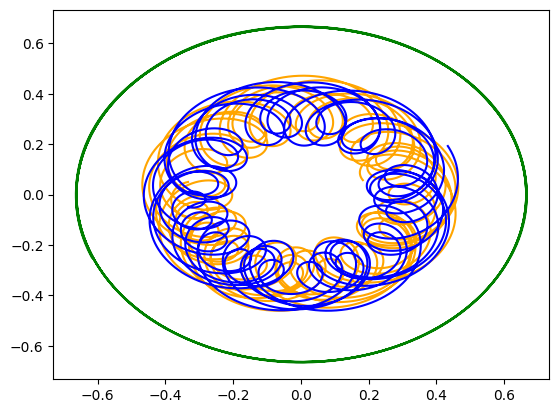

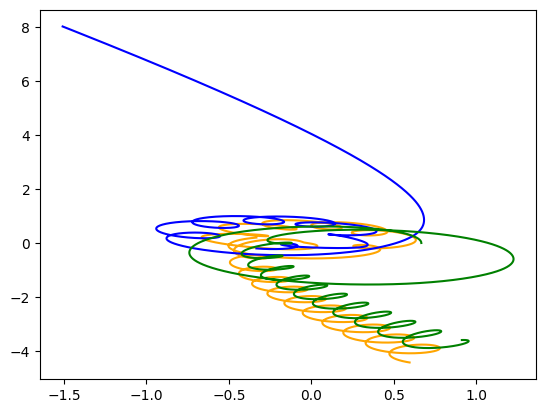

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation

def threebody1(IC: list, masses: list, dt: float = 0.0001, steps: int = 200000):
    """Given a list of "IC" ordered as (x1i, x1j, v1i, v1j, ...), masses of the objects (m1, m2, m3) 
    return a plot showing the three body probelem for the objects """

    ## define constants
    G = 1
    m1 = masses[0]
    m2 = masses[1]
    m3 = masses[2]
    ## initial conditions
    x1i = IC[0]
    x1j = IC[1]
    v1i = IC[2]
    v1j = IC[3]

    x2i = IC[4]
    x2j = IC[5]
    v2i = IC[6]
    v2j = IC[7]

    x3i = IC[8]
    x3j = IC[9]
    v3i = IC[10]
    v3j = IC[11]

    ## define arrays for position and velocity
    x1 = np.zeros((2, int(steps)))
    v1 = np.zeros((2, int(steps)))
    a1 = np.zeros((2, int(steps)))

    x2 = np.zeros((2, int(steps)))
    v2 = np.zeros((2, int(steps)))
    a2 = np.zeros((2, int(steps)))

    x3 = np.zeros((2, int(steps)))
    v3 = np.zeros((2, int(steps)))
    a3 = np.zeros((2, int(steps)))

    x12 = np.zeros(int(steps))
    x23 = np.zeros(int(steps))
    x13 = np.zeros(int(steps))

    COM = np.zeros((2, int(steps)))

    ## initial conditions
    x1[0][0] = x1i
    x1[1][0] = x1j
    v1[0][0] = v1i
    v1[1][0] = v1j

    x2[0][0] = x2i
    x2[1][0] = x2j
    v2[0][0] = v2i
    v2[1][0] = v2j

    x3[0][0] = x3i
    x3[1][0] = x3j
    v3[0][0] = v3i
    v3[1][0] = v3j

    for i in range(0, steps-1):
        ## define distances
        x12[i] = np.sqrt( (x2[0][i]-x1[0][i])**2 + (x2[1][i]-x1[1][i])**2)
        x13[i] = np.sqrt( (x3[0][i]-x1[0][i])**2 + (x3[1][i]-x1[1][i])**2 )
        x23[i] = np.sqrt((x2[0][i]-x3[0][i])**2 + (x2[1][i]-x3[1][i])**2)
        
    

        for j in range(0,2):

            COM[j][i] = (m1*x1[j][i] + m2*x2[j][i] +m3*x3[j][i])/(m1 + m2 + m3)

            ##calculate acceleration
            a1[j][i] = G*m2*(1/x12[i]**3)*(x2[j][i] - x1[j][i]) + G*m3*(1/x13[i]**3)*(x3[j][i] - x1[j][i])
            a2[j][i] = G*m1*(1/x12[i]**3)*(x1[j][i] - x2[j][i]) + G*m3*(1/x23[i]**3)*(x3[j][i] - x2[j][i])
            a3[j][i] = G*m1*(1/x13[i]**3)*(x1[j][i] - x3[j][i]) + G*m3*(1/x23[i]**3)*(x2[j][i] - x3[j][i])


            ## update velocities

            v1[j][i+1] = v1[j][i] + a1[j][i]*dt
            v2[j][i+1] = v2[j][i] + a2[j][i]*dt
            v3[j][i+1] = v3[j][i] + a3[j][i]*dt

            ## update positions:
            x1[j][i+1] = x1[j][i] + v1[j][i]*dt
            x2[j][i+1] = x2[j][i] + v2[j][i]*dt
            x3[j][i+1] = x3[j][i] + v3[j][i]*dt

    x = np.array([x1, x2, x3])
    COM[0][steps-1] = (m1*x1[0][steps-1] + m2*x2[0][steps-1] +m3*x3[0][steps-1])/(m1 + m2 + m3)
    COM[1][steps-1] = (m1*x1[1][steps-1] + m2*x2[1][steps-1] +m3*x3[1][steps-1])/(m1 + m2 + m3)
    plt.figure()
    plt.plot(x1[0]-COM[0], x1[1]-COM[1], 'orange')
    plt.plot(x2[0]-COM[0], x2[1]-COM[1], 'blue')
    plt.plot(x3[0]-COM[0], x3[1]-COM[1], 'green')
    return x



    


def solvethebody():
    m1 = float(input("what is the first mass?"))
    m2 = float(input("what is the second mass?"))
    m3 = float(input("what is the third mass?"))

    x1x = float(input("what is the x position of the 1st mass?"))
    x1y = float(input("what is the y position of the 1st mass?"))
    v1x = float(input("what is the x velocity of the 1st mass?"))
    v1y = float(input("what is the y velocity of the 1st mass?"))

    x2x = float(input("what is the x position of the 2nd mass?"))
    x2y = float(input("what is the y position of the 2nd mass?"))
    v2x = float(input("what is the x velocity of the 2nd mass?"))
    v2y = float(input("what is the y velocity of the 2nd mass?"))

    x3x = float(input("what is the x position of the 3rd mass?"))
    x3y = float(input("what is the y position of the 3rd mass?"))
    v3x = float(input("what is the x velocity of the 3rd mass?"))
    v3y = float(input("what is the y velocity of the 3rd mass?"))

    dt = float(input("dt?"))
    steps = int(input("# of steps"))

    ICs = [x1x, x1y, v1x, v1y, x2x,x2y, v2x, v2y, x3x, x3y, v3x, v3y]
    masses = [m1, m2, m3]

    if dt == 0 or steps == 0:
        return threebody1(ICs, masses)
    else:
        return threebody1(ICs, masses, dt, steps)
    


def animatethebody(IC, mass, func):
    x = np.array(func(IC, mass, 0.001, 5000))
    ## note that with this, x[0] = x1, x[1] = x2, x[2] = x3 and x[0][0] = x1x etc.
    print(type(x))
    fig, ax = plt.subplots()
    line1, = ax.plot(x[0][0], x[0][1])
    line2, = ax.plot(x[1][0], x[1][1])
    line3, = ax.plot(x[2][0], x[2][1])

    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        line3.set_data([], [])
        return line1, line2, line3


    def update(num):
        line1.set_data(x[0][0][:num], x[0][1][:num])
        line2.set_data(x[1][0][:num], x[1][1][:num])
        line3.set_data(x[2][0][:num], x[2][1][:num])
        return line1,

    ani = animation.FuncAnimation(fig, func=update, frames=len(x[0][0]), interval=1, blit=True, init_func=init)
    ani.save('C:/Users/trick/Downloads/3bodygood.gif', writer='imagemagick', fps=60)
    



    
a = 0.1
R = 1
b = 0.4
R2 = 1+10e-6
ICs = [0,  a/2, -np.sqrt(1/(2*a)),  0,  0,  -a/2,  np.sqrt(1/(2*a)), 0, R, 0, 0, np.sqrt(3/R)]
masses = [1,1,1]
IC2 = [0,  b/2, -np.sqrt(1/(2*b)),  0,  0,  -b/2,  np.sqrt(1/(2*b)), 0, R2, 0, 0, np.sqrt(3/R2)]

threebody1(ICs, masses)
threebody1(IC2, masses)

